# UDD - MDS - EstatísticasDS-18

- __Desarrollado por Marcelo José Rovai en 15/8/18__
- __Prof. Abel Valdebenito__

---

##   Análisis de las causas de incendios forestales "Forest Fires  o Wildfires"
<img src="./images/incendio.jpg"width='600' align="left">

## Tabla de Contenidos
### <a href='#objetivo'>Objetivo</a>
### <a href='#dataset'>Dataset</a>
### <a href='#tarea1'>Tarea 1 - Análisis descriptivo de los datos</a>
### <a href='#tarea2'>Tarea 2 - Realizar e interpretar los diferentes testes de hipótesis</a>
### <a href='#tarea3'>Tarea 3 - Implementar modelos estadísticos</a>

<a id='objetivo'></a>
### Objetivo
Mi objetivo con este estudio estadístico, es inferir a cerca de cuales son los factores mas importantes que llevan a incendios forestales, los llamados "Wind Fires". Para este estudio, se llevará en cuenta los datos reales capturados a partir de incendios ocurridos en el Parque Natural de Montesinho, Portugal. 

<a id='dataset'></a>
### Dataset
El dataset a ser utilizado en este estudio fue obtenido desde:
<p>https://archive.ics.uci.edu/ml/machine-learning-databases/forest-fires/</p>

  P. Cortez and A. Morais. A Data Mining Approach to Predict Forest Fires using Meteorological Data. 
  In J. Neves, M. F. Santos and J. Machado Eds., New Trends in Artificial Intelligence, 
  Proceedings of the 13th EPIA 2007 - Portuguese Conference on Artificial Intelligence, December, 
  Guimaraes, Portugal, pp. 512-523, 2007. APPIA, ISBN-13 978-989-95618-0-9. 
  Available at: http://www.dsi.uminho.pt/~pcortez/fires.pdf 

#### Nota a cerca del análisis de los datos: 
La base de datos muestra las condiciones climáticas en el instante en que ocurrieron incendios forestales en el parque Natural de Montesinho [https://www.montesinho.com/es]. Los datos utilizados en los experimentos fueron colectados de enero, 2000 hasta diciembre 2003. El FWI (Fire Weather Index), indica la intensidad del fuego y es calculado principalmente a partir de los datos obtenidos con las instancias: FFMC, DMC, DC y ISI. Estas 4 instancias son calculadas a partir de __datos históricos__ tales como temperatura, humidad, velocidad del viento y lluvia. En el presente estúdio, voy a hacer una analisis descriptiva con foco en los datos meteorológicos __del momento__ de los incendios, los cuales son los que aparecen en el dataset. 

#### Parque Natural de Montesinho - Portugal 
El Parque Natural de Montesinho es uno de los mayores parques naturales de los 12 existentes en Portugal (74.230 hectáreas). Está situado en la región de Trás – os – Montes (en el noreste de Portugal), que cubre la parte norte de los municipios de Bragança y Vinhais, formando parte de la denominada “Terra Fria Transmontana”. El parque cuenta con dos grandes montañas - Serra da Coroa (lado oeste) y Serra de Montesinho (lado este), que da su nombre al parque. 
<p>"Ninguna otra área protegida expresa mejor el contraste de las estaciones como Montesinho." NATIONAL GEOGRAPHIC - Diciembre 2004 Revista No. 45 </p>


 __Informacíon a cerca de los atributos (tal como encontrado en el site del UCI):__

   1. X - x-axis spatial coordinate within the Montesinho park map: 1 to 9
   2. Y - y-axis spatial coordinate within the Montesinho park map: 2 to 9
   3. month - month of the year: "jan" to "dec" 
   4. day - day of the week: "mon" to "sun"
   5. FFMC - FFMC index from the FWI system: 18.7 to 96.20
   6. DMC - DMC index from the FWI system: 1.1 to 291.3 
   7. DC - DC index from the FWI system: 7.9 to 860.6 
   8. ISI - ISI index from the FWI system: 0.0 to 56.10
   9. temp - temperature in Celsius degrees: 2.2 to 33.30
   10. RH - relative humidity in %: 15.0 to 100
   11. wind - wind speed in km/h: 0.40 to 9.40 
   12. rain - outside rain in mm/m2 : 0.0 to 6.4 
   13. area - the burned area of the forest (in ha): 0.00 to 1090.84 
<br>
<p> Abajo el mapa del parque donde se ve las coordenadas X y Y 

<img src="./images/montesinho.png" width='600' align="left">

---

<a id='tarea1'></a>
## Tarea 1
### Análisis descriptivo de los datos

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import tstd
from scipy.stats import skew
from scipy.stats import kurtosis
from scipy.stats import variation
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()
import warnings
warnings.filterwarnings("ignore")

## Parte A - Definición de las librerías y carga del dataset

#### Cargando el Dataset

In [2]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/forest-fires/forestfires.csv')

In [3]:
df.shape # (517, 13)

(517, 13)

In [4]:
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [5]:
# descripción general de los datos
df.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


## Parte B - Análisis de los valores capturados pelos sensores

### 1. Análisis del atributo "Temperatura (temp)"

In [6]:
temp = df.temp # df['temp']

In [7]:
temp.describe()

count    517.000000
mean      18.889168
std        5.806625
min        2.200000
25%       15.500000
50%       19.300000
75%       22.800000
max       33.300000
Name: temp, dtype: float64

__Análisis:__ Por la descripción de los principales valores estadísticos relativos al atributo "temperatura", se observa que la gran mayoría de los incendios ocurren entre 15.5 oC (25% 1o.Q) y 22.8 oC (75% 3o.Q). Este rango es exactamente el IQR. Pero el "Rango total" (Range) seria de 15.6oC ((Tmax - Tmin)/2). Note que estamos mirando la dispersión entre el punto medio y el extremo, entonces dividimos por dos. La mediana es 19.3oC (50% de los datos) y la media de los datos es 18.9oC con una desviación estándar de 5.8oC. Estos valores se pueden calcular por separado (note que estoy trabajando con una casa de precisión ya que los datos originales también se presentan con una casa decimal de precisión): 

In [8]:
# Cálculo de la media:
round(temp.mean(), 1)

18.9

In [9]:
# Cálculo de la mediana:
round(temp.median(), 1)

19.3

In [10]:
# Range
round(np.ptp(temp))/2

15.5

In [11]:
# Desviación estándar
round(tstd(temp,axis =0), 1)

5.8

La grafica Box-Plot, nos dá una visión grafica de como se distribuyen los datos, en función das métricas discutidas arriba: 

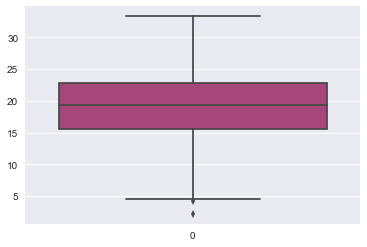

In [12]:
sns.boxplot(data=temp, orient="v", palette="magma")

#### Profundando la visión de la Distribución 

In [13]:
# Coeficiente de Variación (C.V.)
round(variation(temp)*100, 1)

30.7

__Análisis:__ La distribución tiene un C.V. menor que 100, por lo que entonces se considera de "baja varianza". 

In [14]:
# Cálculo de la moda:
temp.mode()

0    17.4
1    19.6
dtype: float64

__Análisis:__ La moda (19.6) es un poco mas grande que la mediana (19.3), que por su vez es un poco mas grande que la media (18.9), lo que indica que la distribución debe ser do tipo __"left skell" (sesgada a la izquierda)__

In [15]:
skew(temp)

-0.3302106140354586

__Análisis:__ El coeficiente es menor a cero, lo que confirma que la distribución es ___sesgada a la izquierda___, y en consecuencia presenta mayor numero de observaciones a la derecha.

In [16]:
kurtosis(temp)

0.12326917606611909

__Análisis:__  La kurtosis es un estadístico que nos indica que tanto es el "apuntalamiento" de los datos en la instancia que se está observando. En el caso se ve que la distribución es do tipo __leptocúrtica__, pues κ̂ < 3 (0.12).

 La grafica abajo confirma visualmente como es la distribución de los datos (mas "delgada" y sesgada a izquierda):

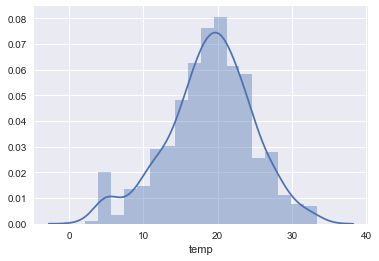

In [17]:
sns.distplot(temp)

__Distribución cumulada__

Text(0,0.5,'Cummulated probabilities')

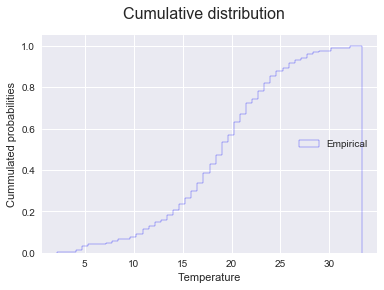

In [18]:
n_bins = 50
# plot the cumulative histogram
n, bins, patches = plt.hist(np.array(temp), n_bins, density=True, histtype='step',
                           cumulative=True, color='blue', label='Empirical')

# tidy up the figure
plt.grid(True)
plt.legend(loc='right')
plt.suptitle('Cumulative distribution', fontsize=16)
plt.xlabel('Temperature')
plt.ylabel('Cummulated probabilities')

#### Conclusión Preliminar 1
Mirando solamente para la temperatura del día cuando ocurrieron los incendios, se podría PRELIMINARMENTE concluir que ellos ocurren en su mayoría con temperaturas al rededor de 19oC, o sea en días con temperatura agradable y amena (y no en días muy calientes). 

### 2. Análisis del atributo "Humidad Relativa (RH)"

In [19]:
hum = df.RH

hum.describe()

count    517.000000
mean      44.288201
std       16.317469
min       15.000000
25%       33.000000
50%       42.000000
75%       53.000000
max      100.000000
Name: RH, dtype: float64

__Análisis:__ Por la descripción de los principales valores estadísticos relativos al atributo "Humidad Relativa", se observa que la gran mayoría de los incendios ocurre entre 33% (Q1) y 53% (Q3). Este rango es exactamente el IQR. Pero el "Rango total" (Range) sería de 10% ((RH max - RH min)/2). Note que estamos calculando la dispersión entre el punto medio y el extremo, entonces dividimos por dos. La mediana es 42% (50% de los datos) y la media de los datos es 44.3% con una desviación estándar de 16.3%. Estos valores se pueden calcular por separado (note que estoy trabajando con una casa de precisión ya que los datos originales también tienen una casa decimal de precisión): 

Para simplificar, criaré funciónes que nos imprima las principales métricas relativas a los datos y su distribución:  

In [20]:
def sumario_estat(df):
    n = df.count()
    mu = round(df.mean(), 1)
    sg = round(tstd(df,axis =0), 1)
    md = round(df.median(), 1)
    rg = round(np.ptp(df))/2
    vr = round(variation(df)*100, 1)
    
    print ("\n * Sumário estatístico de los datos *\n")
    print("N        ", n)
    print("Mean     ", mu)
    print("Std Dev  ", sg)
    print("Median   ", md)
    print("Range    ", rg)
    if vr<100: 
        print("V.R.: {} ==> Baja varianza".format(vr))
    else:
        print("V.R.: {} ==> Alta varianza".format(vr))
    
    sns.boxplot(data=df, orient="v", palette="magma", )   


 * Sumário estatístico de los datos *

N         517
Mean      44.3
Std Dev   16.3
Median    42.0
Range     42.5
V.R.: 36.8 ==> Baja varianza


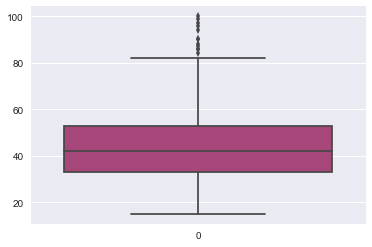

In [21]:
sumario_estat(hum)

In [22]:
def analise_distr(df):
    sk = round(skew(df), 1)
    kt = round(kurtosis(df), 1)
    
    print ("\n * Análisis de la distribución de los datos *\n")
    if sk < -0.8: 
        print ("Skew: {} ==> Distribución es sesgada a la izquierda (LEFT SKEW)".format(sk)) 
    elif sk>0.8: 
        print ("Skew: {} ==> Distribución es sesgada a la derecha (RIGHT SKEW)".format(sk))
    else: 
        print ("Skew: {} ==> Distribución normal (-0.3 < sk > +0.3)".format(sk)) 
                 
    if kt > 3: 
        print ("Kurtosis: {} ==> Distribución es Platicúrtica".format(kt)) 
    elif kt<-3: 
        print ("Kurtosis: {} ==> Distribución es  Leptocúrtica".format(kt)) 
    else: 
        print ("Kurtosis: {} ==> Distribución es Mesocúrtica (-3 < kt > +3)".format(kt))
    
    sns.distplot(df)


 * Análisis de la distribución de los datos *

Skew: 0.9 ==> Distribución es sesgada a la derecha (RIGHT SKEW)
Kurtosis: 0.4 ==> Distribución es Mesocúrtica (-3 < kt > +3)


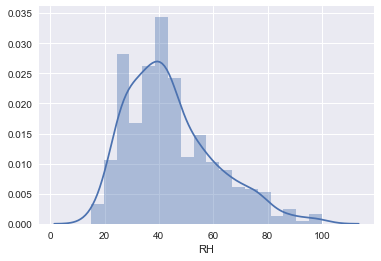

In [23]:
analise_distr(hum)

In [24]:
def distr_acum_empírico(df):
    n_bins = 50
    n, bins, patches = plt.hist(np.array(df), n_bins, density=True, histtype='step',
                           cumulative=True, color='blue', label='Empirical')
    plt.grid(True)
    plt.legend(loc='right')
    plt.suptitle('Cumulative distribution', fontsize=16)
    plt.xlabel('data')
    plt.ylabel('Cummulated probabilities')

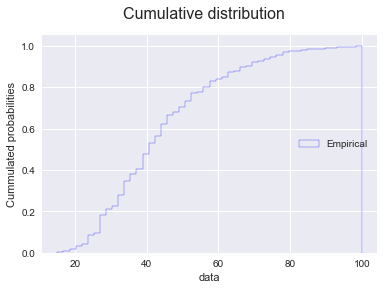

In [25]:
distr_acum_empírico(hum)

#### Conclusión Preliminar 2
Mirando solamente para la humidad y temperatura del día cuando ocurrieron los incendios, se podría PRELIMINARMENTE concluir que ellos ocurren en su mayoría en días secos con humidad del aire al rededor de 40% y al temperaturas al rededor de 19oC, o sea en días secos con temperatura agradable y amena (y no en días muy calientes o muy húmidos). 

### 3. Análisis del atributo "Velocidad del viento (wind)"

In [26]:
wind = df.wind

In [27]:
wind.describe()

count    517.000000
mean       4.017602
std        1.791653
min        0.400000
25%        2.700000
50%        4.000000
75%        4.900000
max        9.400000
Name: wind, dtype: float64


 * Sumário estatístico de los datos *

N         517
Mean      4.0
Std Dev   1.8
Median    4.0
Range     4.5
V.R.: 44.6 ==> Baja varianza


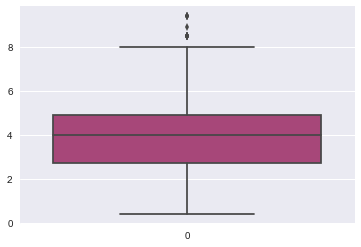

In [28]:
sumario_estat(wind)


 * Análisis de la distribución de los datos *

Skew: 0.6 ==> Distribución normal (-0.3 < sk > +0.3)
Kurtosis: 0.0 ==> Distribución es Mesocúrtica (-3 < kt > +3)


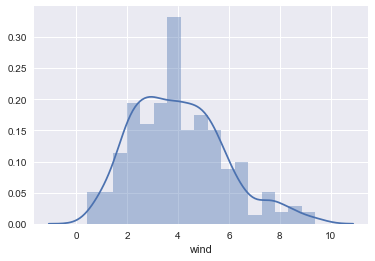

In [29]:
analise_distr(wind)

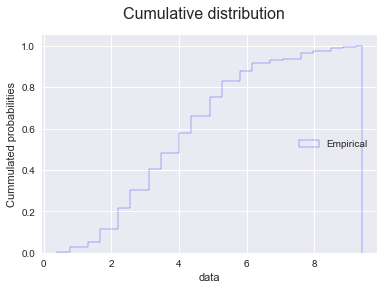

In [30]:
distr_acum_empírico(wind)

#### Conclusión Preliminar 3
Mirando solamente para la velocidad del viento, se ve que los incendios en su mayoría ocurren al rededor de 4Km/h (viento liviano). Me parece entonces que la velocidad del viento no juega por sí sola, un papel importante en la GENERACIÓN de incendio. Hay que estudiar un poco más, relacionando con otros atributos, como la "área" de quemada generada por los incendios. 

### 4. Análisis del atributo "Área quemada por el incendio (area)"

In [31]:
area = df.area

In [32]:
area.describe()

count     517.000000
mean       12.847292
std        63.655818
min         0.000000
25%         0.000000
50%         0.520000
75%         6.570000
max      1090.840000
Name: area, dtype: float64


 * Sumário estatístico de los datos *

N         517
Mean      12.8
Std Dev   63.7
Median    0.5
Range     545.5
V.R.: 495.0 ==> Alta varianza


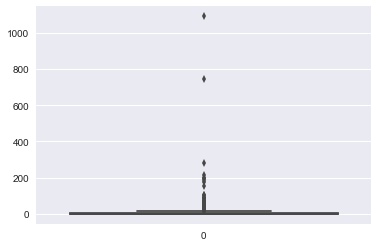

In [33]:
sumario_estat(area)


 * Análisis de la distribución de los datos *

Skew: 12.8 ==> Distribución es sesgada a la derecha (RIGHT SKEW)
Kurtosis: 192.3 ==> Distribución es Platicúrtica


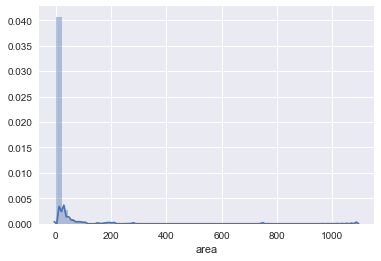

In [34]:
analise_distr(area)

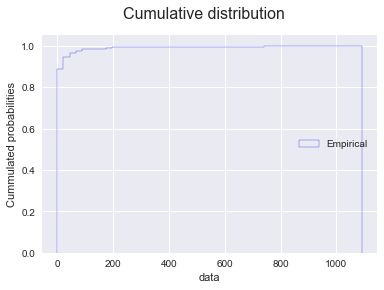

In [35]:
distr_acum_empírico(area)

In [36]:
wind.mode()

0    2.2
1    3.1
dtype: float64

__Análisis:__ Se observa que existe un gran acumulo de datos en valores muy bajos. Analicemos la cantidad de datos con valor "cero" (que son áreas menores a 1 hectárea). Note que con la moda, no se llega ninguna conclusión. 

In [37]:
area.value_counts().head()

0.00    247
1.94      3
3.71      2
0.90      2
1.95      2
Name: area, dtype: int64

__Analisis:__ Se observa que la mitad de los incendios son con área igual a cero (menores que 1ha). Analicemos un subset de datos sin llevar en consideración en "0": 

In [38]:
area_gt0 = area[area > 0]

In [39]:
area_gt0.describe()

count     270.000000
mean       24.600185
std        86.501635
min         0.090000
25%         2.140000
50%         6.370000
75%        15.422500
max      1090.840000
Name: area, dtype: float64


 * Análisis de la distribución de los datos *

Skew: 9.4 ==> Distribución es sesgada a la derecha (RIGHT SKEW)
Kurtosis: 101.8 ==> Distribución es Platicúrtica


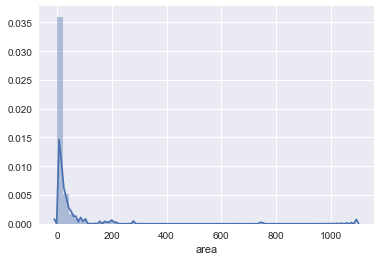

In [40]:
analise_distr(area_gt0)

__Analisis:__ Se observa que partiendo de la media de 24.6 hectáreas, la desviación estándar es de 86.5. O sea case todos los incendios están entre 1 y 100ha, siendo la mediana 6.3 ha (mitad de los incendios están debajo de este valor de área). Graficando: 


 * Análisis de la distribución de los datos *

Skew: 2.4 ==> Distribución es sesgada a la derecha (RIGHT SKEW)
Kurtosis: 6.2 ==> Distribución es Platicúrtica


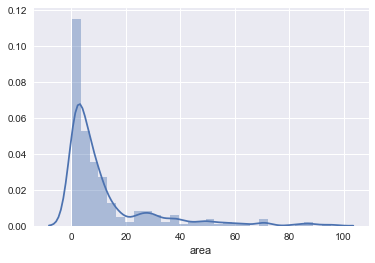

In [41]:
area_focus = area_gt0[area_gt0 <100]
analise_distr(area_focus)

#### Outliers relativos a área de las quemadas
Llevemos en consideración los incendios mas grandes y miremos sus datos:

In [42]:
df[df.area>100]

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
232,6,4,sep,tue,91.0,129.5,692.6,7.0,18.7,43,2.7,0.0,103.39
233,9,4,sep,tue,84.4,73.4,671.9,3.2,24.3,36,3.1,0.0,105.66
234,4,5,sep,sat,92.5,121.1,674.4,8.6,17.7,25,3.1,0.0,154.88
235,8,6,aug,sun,91.4,142.4,601.4,10.6,19.6,41,5.8,0.0,196.48
236,2,2,sep,sat,92.5,121.1,674.4,8.6,18.2,46,1.8,0.0,200.94
237,1,2,sep,tue,91.0,129.5,692.6,7.0,18.8,40,2.2,0.0,212.88
238,6,5,sep,sat,92.5,121.1,674.4,8.6,25.1,27,4.0,0.0,1090.84
377,2,2,aug,sat,93.7,231.1,715.1,8.4,21.9,42,2.2,0.0,174.63
415,8,6,aug,thu,94.8,222.4,698.6,13.9,27.5,27,4.9,0.0,746.28
420,8,8,aug,wed,91.7,191.4,635.9,7.8,26.2,36,4.5,0.0,185.76


In [43]:
df[df.area>100].describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.0,11.000000
mean,5.545455,4.363636,91.336364,144.263636,651.172727,8.190909,21.872727,38.181818,3.563636,0.0,313.660909
std,2.841255,1.911687,2.732864,49.565740,79.208195,2.646679,3.504309,9.474367,1.328362,0.0,312.629622
min,1.000000,2.000000,84.400000,73.400000,431.600000,3.200000,17.700000,25.000000,1.800000,0.0,103.390000
25%,3.000000,3.000000,91.000000,121.100000,653.900000,7.000000,18.750000,31.500000,2.450000,0.0,164.755000
50%,6.000000,4.000000,91.700000,129.500000,674.400000,8.400000,21.900000,40.000000,3.100000,0.0,196.480000
75%,8.000000,5.500000,92.500000,166.900000,692.600000,8.600000,24.700000,42.500000,4.700000,0.0,245.705000
max,9.000000,8.000000,94.800000,231.100000,715.100000,13.900000,27.500000,57.000000,5.800000,0.0,1090.840000


#### Conclusión Preliminar 4
Existen 11 incendios mas grandes que 100ha. Pero mirando temperatura, humidad y viento que ya analizamos, se observa que ellos están dentro del padrón. ¡Días agradables, secos y con poco viento y claro sin lluvia! No parece haber una causa mas especifica para ocurrir grandes incendios basados apenas en los datos de los sensores. 

### 5. Análisis del atributo "Lluvia" (rain)"

In [44]:
rain = df.rain

In [45]:
rain.value_counts()

0.0    509
0.8      2
0.2      2
0.4      1
6.4      1
1.4      1
1.0      1
Name: rain, dtype: int64

In [46]:
rain.describe()

count    517.000000
mean       0.021663
std        0.295959
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        6.400000
Name: rain, dtype: float64

In [47]:
df[df.rain >0]

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
243,7,4,aug,sun,91.8,175.1,700.7,13.8,21.9,73,7.6,1.0,0.00
286,7,6,jul,wed,91.2,183.1,437.7,12.5,12.6,90,7.6,0.2,0.00
499,7,5,aug,tue,96.1,181.1,671.2,14.3,27.3,63,4.9,6.4,10.82
500,8,6,aug,tue,96.1,181.1,671.2,14.3,21.6,65,4.9,0.8,0.00
501,7,5,aug,tue,96.1,181.1,671.2,14.3,21.6,65,4.9,0.8,0.00
502,4,4,aug,tue,96.1,181.1,671.2,14.3,20.7,69,4.9,0.4,0.00
509,5,4,aug,fri,91.0,166.9,752.6,7.1,21.1,71,7.6,1.4,2.17


#### Conclusión Preliminar 5
Menos de 2% de los incendios ocurrieron con lluvia (lo que es obvio) y en la gran mayoría de los casos con áreas quemadas menores que 1ha. Pero llama la atención que el día que más llovió (6.4 mm/m2) fue cuando fue mas grande el incendio (case 11ha quemadas). Tal vez la lluvia complicó las equipes de bomberos. 

## Parte C - Análisis de "cuando" ocurrieron los incéndios 

In [48]:
day = df.day

In [49]:
day.value_counts()

sun    95
fri    85
sat    84
mon    74
tue    64
thu    61
wed    54
Name: day, dtype: int64

In [50]:
month = df.month

In [51]:
month.value_counts()

aug    184
sep    172
mar     54
jul     32
feb     20
jun     17
oct     15
dec      9
apr      9
jan      2
may      2
nov      1
Name: month, dtype: int64

#### Conclusión Preliminar 6
Acá no es necesario mucho análisis. Al filtrar los datos, se observa claramente que la gran mayoría de los incendios ocurre en verano y en las vacaciones del hemisferio norte (agosto/sept). Hay también un numero no menor en marzo, que es el inicio de la primavera. Se observa también que de viernes a domingo son los días de mas ocurrencia de incendios, por lo que es muy claro que el hombre (turistas) es lo mas grande responsable por los incendios que ocurren en parque. 

## Parte D - Análisis de la localización geográfica de  los incendios 

In [52]:
x = df.X

In [53]:
x.value_counts()

4    91
6    86
2    73
8    61
7    60
3    55
1    48
5    30
9    13
Name: X, dtype: int64

In [54]:
y = df.Y

In [55]:
y.value_counts()

4    203
5    125
6     74
3     64
2     44
9      6
8      1
Name: Y, dtype: int64

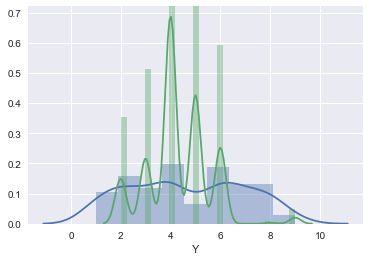

In [56]:
sns.distplot(x)
sns.distplot(y)

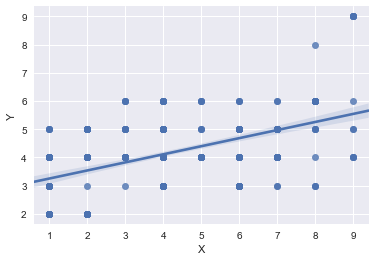

In [57]:
sns.regplot(x=x, y=y)

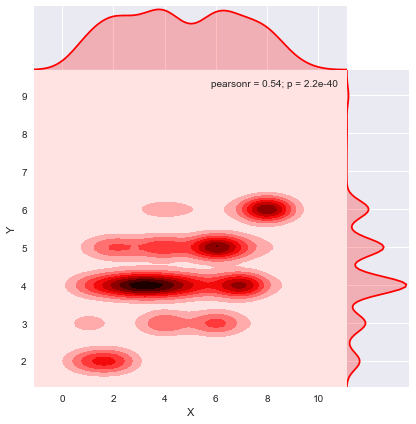

In [58]:
sns.jointplot(x=x, y=y, kind='kde', space=0, color="r")

Posicionamiento dos locales con mayor numero de incendios:

<img src="./images/parque_final.png" width='600' align="left">

#### Conclusión Preliminar 7
En terminos geográficos se determina 4 regiones del parque donde ocurrieron mas incendios

## Parte E - Conclusión

Basado en un análisis estadístico de los datos relativos a los incendios que ocurrieron en el Parque Natural de Montesinho, Portugal entre enero de 2000 y diciembre de 2003, se concluye que los incendios tienen mas probabilidad de ocurrir en 4 sectores específicos del parque, en los fines de semana de las vacaciones de verano, con días secos y de temperatura amena (19/20 oC). Por lo tanto, la causa primaria de los incendios en el parque muy probablemente de deben a los turistas que o visitan. 
<p>Mi sugerencia es poner foco en un trabajo de educación y prevención en estos sectores específicos del parque de manera a enseñar a los turistas el riego de incendios forestales</p>


---

<a id='tarea2'></a>
## Tarea 2
### Realizar e interpretar los diferentes testes de hipótesis

In [59]:
# recargando el dataset original
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/forest-fires/forestfires.csv')
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


Por las analisis anteriores, se verificó que la gran mayoría de los incendios ocurrieron en agosto y septiembre. Aplicaremos testes de hipótesis a los dados capturados en estes meses versus los datos climáticos históricos de la región. 

- ___Datos climáticos históricos de la ciudad de Bragança en la región del parque___
- Temperatura media mes de Ago: `21.1oC`
- Precipitación média total en el mes de Agosto: `8.4mm` 

<p><img src="./images/tabla_clima_braganca.png" width='800' align="left"></p>

###  1. Z-Test "1-Tailed"

__Hipótesis__: "Basado en los datos históricos, la temperatura durante el mes de agosto en la región de Bragança (cuando acurren la maioria de los incendios en el parque) no alcansa los `35oC`"
- Ho: Tmax < 35oC
- Ha: Tmax >= 35

In [60]:
# numero de amuestras de incendios en agosto
n = df.month[df.month == 'aug'].count()
n

184

__Definición del modelo de test a se utilizar__
- n = 184
- "1-Tailed" ('Larger') ==> Como n > 30, ==> Z-Test 

In [61]:
from statsmodels.stats.weightstats import ztest


 * Análisis de la distribución de los datos *

Skew: -0.1 ==> Distribución normal (-0.3 < sk > +0.3)
Kurtosis: 0.7 ==> Distribución es Mesocúrtica (-3 < kt > +3)


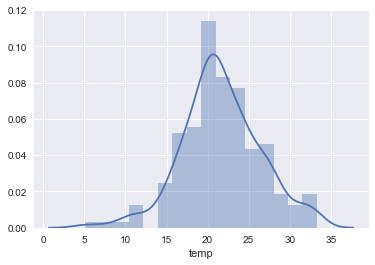

In [62]:
temp_aug = df.temp[df.month == 'aug'] 
analise_distr(temp_aug)

In [63]:
temp_aug.describe()

count    184.000000
mean      21.631522
std        4.807256
min        5.100000
25%       18.900000
50%       21.250000
75%       24.225000
max       33.300000
Name: temp, dtype: float64

In [64]:
ztest(x1=temp_aug, x2=None, value=35, alternative='larger', usevar='pooled', ddof=1.0)

(-37.72190572429776, 1.0)

El p-value es mas grande que 0.05, por lo que __Se Acepta la Hipótesis__

### 2. Z-Test "2-sided"

__Hipótesis__: "Basado en los datos históricos, la temperatura media durante el mes de agosto en la región de Bragança (cuando acurren la maioria de los incendios en el parque) es de `21.1oC`"
- Ho: Tmed = 21.2oC
- Ha: Tmed != 21.2oC

__Definición del modelo de test a se utilizar__
- n = 184
- "2-Tailed" ('two-sided') ==> Como n > 30, ==> Z-Test 

In [65]:
ztest(x1=temp_aug, x2=None, value=21.1, alternative='larger', usevar='pooled', ddof=1.0)

(1.4997976989333721, 0.06683340679228253)

__Conclusión__ El p-value es mas grande que 0.05, por lo que __Se Acepta la Hipótesis__

### 3. The Single-Sample Test for Evaluating Population Skewness

__Hipótesis:__ La muestra de n observaciones de temperatura proviene de una población que es simétrica (i.e., no skewed)?


 * Análisis de la distribución de los datos *

Skew: -0.3 ==> Distribución normal (-0.3 < sk > +0.3)
Kurtosis: 0.1 ==> Distribución es Mesocúrtica (-3 < kt > +3)


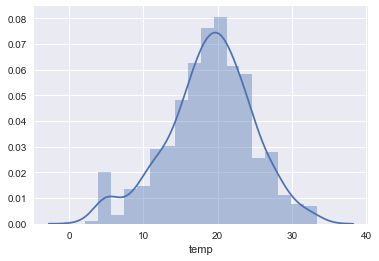

In [66]:
temp = df.temp
analise_distr(temp)

In [67]:
from scipy.stats import skewtest
skewtest(a=temp,axis=0)

SkewtestResult(statistic=-3.0322736209229735, pvalue=0.002427190788694479)

__Conclusión:__ El pValue es menor que 0.05 ==> __Se rechaza la hipotesis__ ==> Conclusión: La distribuición NO es simétrica

### 4. The Single-Sample Test for Evaluating Population Kurtosis

__Hipótesis:__ La muestra de n observaciones de temperatura proviene de una población que es mesocurtica?

In [68]:
from scipy.stats import kurtosistest
kurtosistest(a=temp,axis=0)

KurtosistestResult(statistic=0.7070501127052, pvalue=0.47953533629692924)

__ Conclusión:__ pValue > 0.05 ==> SÍ ==> __Se Acepta la Hipotesis__

### 5. The Kolmogorov-Smirnov Goodness-of-Fit Test for a Single Sample

__Hipótesis:__ La muestra de n observaciones de temperatura proviene distribuye de acuerdo a una distribución de probabilidades teórica (distrib. normal)?

In [69]:
from scipy import stats
from scipy.stats import norm
from scipy.stats import kstest

In [70]:
kstest(temp, lambda x: stats.norm.cdf(x, loc=21.1, scale=80))

KstestResult(statistic=0.4393962952185624, pvalue=0.0)

__ Conclusión:__ pValue > 0.05 ==> SÍ ==> __Se Acepta la Hipotesis__

### 6. The Single-Sample t Test

Tomemos la area de quemada para aplicar el test de hipótisis

Para empezar analicemos los dados

In [71]:
area = df.area.value_counts()
area.head()

0.00    247
1.94      3
3.71      2
0.90      2
1.95      2
Name: area, dtype: int64

Se observa que la mitad de los incendios son con área igual a cero (menores que 1ha).


 * Análisis de la distribución de los datos *

Skew: 15.7 ==> Distribución es sesgada a la derecha (RIGHT SKEW)
Kurtosis: 245.8 ==> Distribución es Platicúrtica


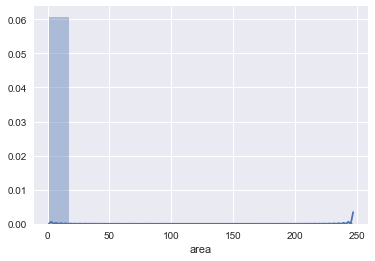

In [72]:
# hist
analise_distr(area)

Para mejor observar estos datos, debemos aplicar a función logarítima a los datos, tal como sugere P. Cortez and A. Morais en su trabajo: "A Data Mining Approach to Predict Forest Fires using Meteorological Data"
- El área quemada se muestra en el histograma arriba, denota un sesgo positivo, con la mayoría de los incendios presentando un tamaño pequeño. Con respecto al presente conjunto de datos, hay 247 muestras con un valor cero, lo que significa que se quemó un área inferior a 1 ha. Para reducir la sesgo y mejorar la simetría, la función del logaritmo y = ln (x + 1) debe ser aplicada a la data.

In [73]:
# Funcion para aplicar el logaritmo a la data
def log_area(x):
    return (np.log(x+1))

In [74]:
area = df.area.apply(log_area)

In [75]:
area.describe()

count    517.000000
mean       1.111026
std        1.398436
min        0.000000
25%        0.000000
50%        0.418710
75%        2.024193
max        6.995620
Name: area, dtype: float64


 * Análisis de la distribución de los datos *

Skew: 1.2 ==> Distribución es sesgada a la derecha (RIGHT SKEW)
Kurtosis: 0.9 ==> Distribución es Mesocúrtica (-3 < kt > +3)


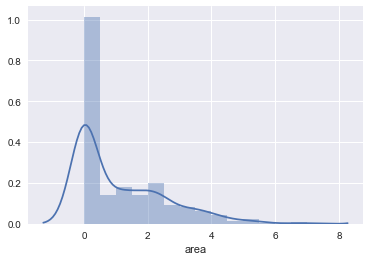

In [76]:
analise_distr(area)


 * Sumário estatístico de los datos *

N         517
Mean      1.1
Std Dev   1.4
Median    0.4
Range     3.5
V.R.: 125.7 ==> Alta varianza


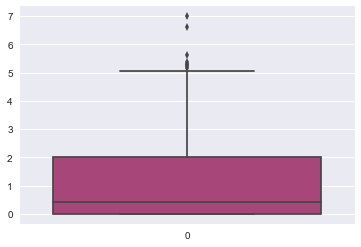

In [77]:
sumario_estat(area)

Los datos están mejores distribuidos, por lo que facilitará la analicis

Testemos la hipotisis de que el $\mu_0$ de la populación es 1. En el caso de una muestra, es el valor del promedio poblacional $\mu_0$ bajo la hipótesis nula $H_0:~ \mu = \mu_0$.

In [78]:
from scipy.stats import ttest_1samp
ttest_1samp(a=area,popmean=1)

Ttest_1sampResult(statistic=1.8052047399466733, pvalue=0.07162541158110282)

__Conclusión:__ El pValue es mas grande que 0.05 ==> __Se acepta la hipotesis__ ==> Conclusión: la media de la populación es posible de ser 1 (o sea, areas de quemadas menores que 1 ha)

### 7. The t Test for Two Independent Samples

__Hipótesis:__ Las temperaturas de los meses de marzo y agosto son iguales

In [79]:
temp_aug = df.temp[df.month == 'aug'] 
temp_mar = df.temp[df.month == 'mar'] 


 * Análisis de la distribución de los datos *

Skew: -0.4 ==> Distribución normal (-0.3 < sk > +0.3)
Kurtosis: -0.4 ==> Distribución es Mesocúrtica (-3 < kt > +3)


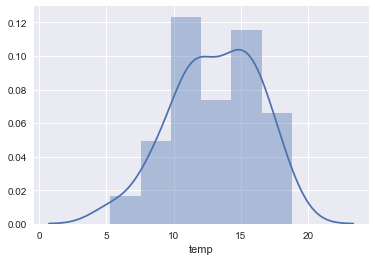

In [80]:
analise_distr(temp_mar)

In [81]:
from scipy.stats.mstats import ttest_ind

In [82]:
ttest_ind(a = temp_aug, b= temp_mar)

Ttest_indResult(statistic=12.28898658911275, pvalue=3.6961427123738e-27)

__Conclusión:__ pValue es < 0.5 (Existe evidencia para __rechazar la hipotese__ Medias iguales)

---

<a id='tarea3'></a>
## Tarea 3
### Implementar modelos estadísticos

In [83]:
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


### Temperatura


 * Sumário estatístico de los datos *

N         517
Mean      44.3
Std Dev   16.3
Median    42.0
Range     42.5
V.R.: 36.8 ==> Baja varianza


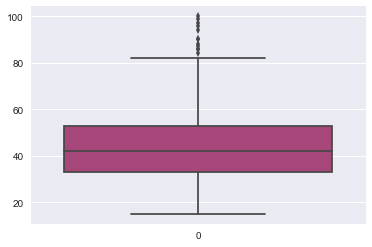

In [84]:
data = df.temp
sumario_estat(hum)


 * Análisis de la distribución de los datos *

Skew: -0.3 ==> Distribución normal (-0.3 < sk > +0.3)
Kurtosis: 0.1 ==> Distribución es Mesocúrtica (-3 < kt > +3)


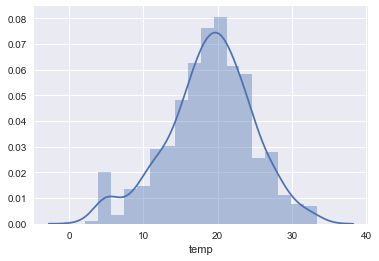

In [85]:
analise_distr(data)

### 1. Teste de Kolmogorov-Smirnov
Inicialmente se hará un teste de hipotesis con algunas distribuiciones y aplicandose el teste de Kolmogorov-Smirnov, se procurá determinar la posibilidad de no se rechazar la distribuicion. 

#### 1.1 Testar la data para el modelo Exponencial

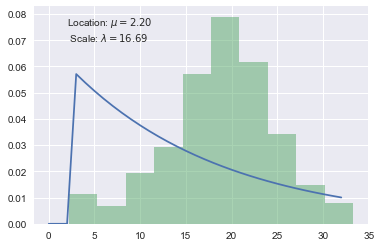

In [162]:
pars_exp = stats.expon.fit(data)
bins = range(int(np.max(data)))
fig = plt.figure() 
ax = fig.add_subplot(1, 1, 1)
ax.plot(bins, stats.expon.pdf(bins, pars_exp[0],pars_exp[1]))
ax.hist(data, bins = 10 , normed=True, alpha=0.5)
ax.annotate("Location: $\mu = %.2f$ \n Scale: $\lambda = %.2f$"%(pars_exp[0],pars_exp[1]), xy=(0.1, 0.85), xycoords=ax.transAxes)
plt.show()

In [87]:
kstest(data, lambda x: stats.expon.cdf(x, pars_exp[0],pars_exp[1]))

KstestResult(statistic=0.3335469405920851, pvalue=0.0)

__Conclusión:__ pValue < 0.05 ==> Rechaza la hipotesis ==> No es una distribuición Exponencial 

#### 1.2. Testar la data para el modelo Gamma

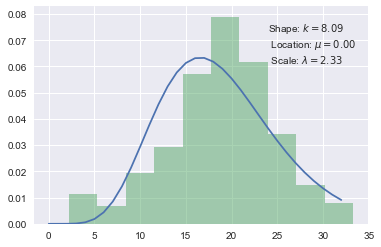

In [163]:
pars_gamma = stats.gamma.fit(data,floc=0)
bins = range(int(np.max(data)))
fig = plt.figure() 
ax = fig.add_subplot(1, 1, 1)
ax.plot(bins, stats.gamma.pdf(bins, pars_gamma[0],pars_gamma[1],pars_gamma[2]))
ax.hist(data, bins = 10 , normed=True, alpha=0.5)
ax.annotate("Shape: $k = %.2f$ \n Location: $\mu = %.2f$ \n Scale: $\lambda = %.2f$"%(pars_gamma[0],pars_gamma[1],pars_gamma[2]), xy=(0.7, 0.75), xycoords=ax.transAxes)
plt.show()

In [89]:
kstest(data, lambda x: stats.gamma.cdf(x, pars_gamma[0],pars_gamma[1],pars_gamma[2]))

KstestResult(statistic=0.10880929975787457, pvalue=8.72978261989843e-06)

__Conclusión:__ pValue < 0.05 ==> Rechasa la hipotesis ==> No es una distribuición Gamma 

#### 1.3. Testar la data para el modelo Weibull

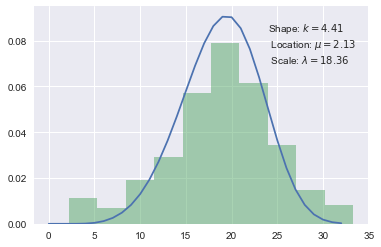

In [164]:
pars_weib = stats.weibull_min.fit(data)
bins = range(int(np.max(data)))
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(bins, stats.weibull_min.pdf(bins, pars_weib[0],pars_weib[1],pars_weib[2]))
ax.hist(data, bins = 10 , normed=True, alpha=0.5)
ax.annotate("Shape: $k = %.2f$ \n Location: $\mu = %.2f$ \n Scale: $\lambda = %.2f$"%(pars_weib[0],pars_weib[1],pars_weib[2]), xy=(0.7, 0.75), xycoords=ax.transAxes)
plt.show()

In [91]:
kstest(data, lambda x: stats.weibull_min.cdf(x, pars_weib[0],pars_weib[1],pars_weib[2]))

KstestResult(statistic=0.0726335815796747, pvalue=0.008111960431755882)

__Conclusión:__ pValue < 0.05 ==> Rechasa la hipotesis ==> No es una distribuición Weibull 

#### 1.4. Testar la data para el modelo Lognormal

In [92]:
pars_lognorm = stats.lognorm.fit(data)
pars_lognorm

(0.005357650796127791, -1059.6714954083936, 1078.5446180089548)

In [93]:
k = len(pars_lognorm)
k

3

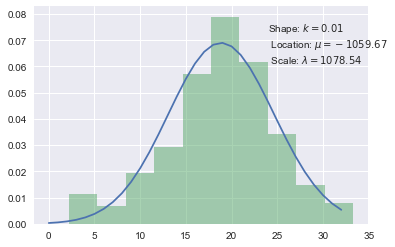

In [165]:
fig = plt.figure() 
bins = range(int(np.max(data)))
ax = fig.add_subplot(1, 1, 1)
ax.plot(bins, stats.lognorm.pdf(bins, pars_lognorm[0],pars_lognorm[1],pars_lognorm[2]))
ax.hist(data, bins = 10 , normed=True, alpha=0.5)
ax.annotate("Shape: $k = %.2f$ \n Location: $\mu = %.2f$ \n Scale: $\lambda = %.2f$"%(pars_lognorm[0],pars_lognorm[1],pars_lognorm[2]), xy=(0.7, 0.75), xycoords=ax.transAxes)
plt.show()

In [95]:
kstest(data, lambda x: stats.lognorm.cdf(x, pars_lognorm[0],pars_lognorm[1],pars_lognorm[2]))

KstestResult(statistic=0.05092869582267828, pvalue=0.1322398830347009)

__Conclusión:__ pValue > 0.05 ==> Se accepta la hipotesis ==> No se puede rechazar la hipótesis que la distribuición sea Lognormal

#### 1.5. Testar la data para el modelo Genlogistic

In [96]:
pars_genlogistic = stats.genlogistic.fit(data)
pars_genlogistic

(0.655227601574581, 21.022038875391274, 2.7279364680798266)

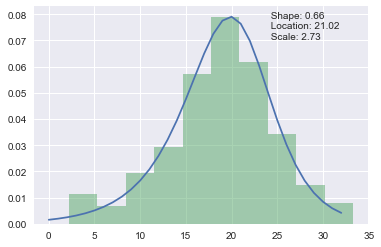

In [166]:
fig = plt.figure() 
bins = range(int(np.max(data)))
ax = fig.add_subplot(1, 1, 1)
ax.plot(bins, stats.genlogistic.pdf(bins, pars_genlogistic[0],pars_genlogistic[1],pars_genlogistic[2]))
ax.hist(data, bins = 10 , normed=True, alpha=0.5)
ax.annotate(" Shape: %.2f \n Location: %.2f \n Scale: %.2f"%(pars_genlogistic[0],pars_genlogistic[1],pars_genlogistic[2]), xy=(0.7, 0.85), xycoords=ax.transAxes)
plt.show()

In [98]:
kstest(data, lambda x: stats.genlogistic.cdf(x, pars_genlogistic[0],pars_genlogistic[1],pars_genlogistic[2]))

KstestResult(statistic=0.02281348313274588, pvalue=0.9506907849291824)

__Conclusión:__ pValue > 0.05 ==> Se accepta la hipotesis ==> No se puede rechazar la hipótesis que la distribuición sea Lognormal

#### 1.6. Testar la data para el modelo Gumbel

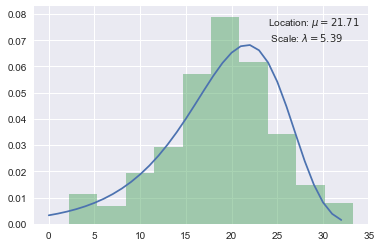

In [167]:
pars_gumbells = stats.gumbel_l.fit(data)
bins = range(int(np.max(data)))
fig = plt.figure() 
ax = fig.add_subplot(1, 1, 1)
ax.plot(bins, stats.gumbel_l.pdf(bins, pars_gumbells[0],pars_gumbells[1]))
ax.hist(data, bins = 10 , normed=True, alpha=0.5)
ax.annotate("Location: $\mu = %.2f$ \n Scale: $\lambda = %.2f$"%(pars_gumbells[0],pars_gumbells[1]), xy=(0.7, 0.85), xycoords=ax.transAxes)
plt.show()

In [100]:
ks_gumbel = kstest(data, lambda x: stats.gumbel_l.cdf(x, pars_gumbells[0],pars_gumbells[1]))
ks_gumbel

KstestResult(statistic=0.06834833108506055, pvalue=0.015210855380553223)

__Conclusión:__ pValue < 0.05 ==> Rechasa la hipotesis ==> No es una distribuición Gumbells 

#### 1.7. Testar la data para el modelo Normal

In [101]:
pars_norm = stats.norm.fit(data)

In [102]:
pars_norm

(18.88916827852998, 5.801006939598366)

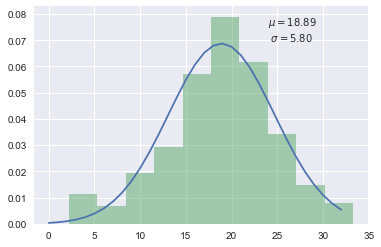

In [168]:
fig = plt.figure() 
bins = range(int(np.max(data)))
ax = fig.add_subplot(1, 1, 1)
ax.plot(bins, stats.norm.pdf(bins, pars_norm[0],pars_norm[1]))
ax.annotate("$\mu = %.2f$ \n $\sigma = %.2f$"%(pars_norm[0],pars_norm[1]), xy=(0.7, 0.85), xycoords=ax.transAxes)
ax.hist(data, bins = 10 , normed=True, alpha=0.5)
plt.show()

In [104]:
kstest(data, lambda x: stats.norm.cdf(x, pars_norm[0],pars_norm[1]))

KstestResult(statistic=0.050625166705360825, pvalue=0.13655341051967174)

__Conclusión:__ pValue > 0.05 ==> Se accepta la hipotesis ==> No se puede rechazar la hipótesis que la distribuición sea Normal      

#### Automatizando el teste de Kolmogorov-Smirnov 

Para testear el caso específico de la distribuición Normal

In [105]:
def teste_ajuste_normal(data):
    media, desv = stats.norm.fit(data)
    k_result = kstest(data, lambda x: stats.norm.cdf(x, media, desv))
 
    if k_result[-1] < 0.05:
        print("pvalue =",round(k_result[-1], 3),"==> No se ajusta al modelo de distribuición Normal")
    else:
        print("pvalue =",round(k_result[-1], 3),"==> No se puede rechazar la hipótesis que la distribuición sea Normal")

In [106]:
teste_ajuste_normal(data)

pvalue = 0.137 ==> No se puede rechazar la hipótesis que la distribuición sea Normal


Caso general (aún hay que terminar, pues lleva a error ==> pvalue = 0):

### 2. Verosimilitud

In [107]:
LL_expon = sum(stats.expon.logpdf(data, loc=pars_exp[0], scale=pars_exp[1]))
LL_expon

-1972.2308698143372

In [108]:
LL_gamma = sum(stats.gamma.logpdf(data, a=pars_gamma[0], loc=pars_gamma[1], scale=pars_gamma[2]))
LL_gamma

-1690.3329466126822

In [109]:
LL_weib = sum(stats.weibull_min.logpdf(data, c=pars_weib[0], loc=pars_weib[1], scale=pars_weib[2]))
LL_weib

-1725.322987045276

In [110]:
LL_lognorm = sum(stats.lognorm.logpdf(data, pars_lognorm[0], pars_lognorm[1], pars_lognorm[2]))
LL_lognorm

-1642.9762714285275

In [111]:
LL_genlogistic = sum(stats.genlogistic.logpdf(data, pars_genlogistic[0], pars_genlogistic[1], pars_genlogistic[2]))
LL_genlogistic

-1639.226795006645

In [112]:
LL_gumbells = sum(stats.gumbel_l.logpdf(data, pars_gumbells[0], pars_gumbells[1]))
LL_gumbells

-1657.9240218409661

In [113]:
LL_norm = sum(stats.norm.logpdf(data, pars_norm[0], pars_norm[1]))
LL_norm

-1642.4935137634411

__Conclusión:__ Tomando-se os numeros mas grandes (max) llegamos a seguinte ordenen:
- LL_genlogistic (-1639)
- LL_norm (-1642)
- LL_lognorm (-1643)
<br>
<p>Por lo que Genlogistic apunta como la mejor opcion</p>

### 3. Criterio de Información de Akaike (AIC)

En el caso general, el AIC se cálcula cómo
<p>
${\displaystyle {\mathit {AIC}}=2k-2\ln(L)}$
</p>
donde k es el número de parámetros en el modelo estadístico , y L es el máximo valor de la función de verosimilitud para el modelo estimado.

In [114]:
def AIC_compute(p_model,LL_model):
    AIC_model = 2*p_model - 2*LL_model
    return AIC_model

In [115]:
AIC_expon = AIC_compute(2,LL_expon)
AIC_expon

3948.4617396286744

In [116]:
AIC_gamma = AIC_compute(3,LL_gamma)
AIC_gamma

3386.6658932253645

In [117]:
AIC_weib = AIC_compute(3,LL_weib)
AIC_weib

3456.645974090552

In [118]:
AIC_lognorm = AIC_compute(3,LL_lognorm)
AIC_lognorm

3291.952542857055

In [119]:
AIC_genlogistic = AIC_compute(3,LL_genlogistic)
AIC_genlogistic

3284.45359001329

In [120]:
AIC_gumbells = AIC_compute(2,LL_gumbells)
AIC_gumbells

3319.8480436819323

In [121]:
AIC_norm = AIC_compute(2,LL_norm)
AIC_norm

3288.9870275268822

__Conclusión:__ Tomando-se os menores valores de AIC llegamos a seguinte ordenen:
- LL_genlogistic (3284)
- LL_norm        (3289)
- LL_lognorm     (3292)
<br>
<p>Por lo que Genlogistic apunta como la mejor opcion</p>

### 4. Criterio de Información Bayesiano de Schartz (BIC)
En el caso general, el BIC se cálcula cómo <br>
${\displaystyle {\mathit {BIC}}=ln(n)k-2\ln(L)}$
<br>donde k es el número de parámetros en el modelo estadístico, y L es el máximo valor de la función de verosimilitud para el modelo estimado.

In [122]:
def BIC_compute(n_data,p_model,LL_model):
    AIC_model = np.log(n_data)*p_model - 2*LL_model
    return AIC_model

In [123]:
n  = data.count()

In [124]:
BIC_expon = BIC_compute(n,2,LL_expon)
BIC_expon

3956.9578253776913

In [125]:
BIC_gamma = BIC_compute(n,3,LL_gamma)
AIC_gamma

3386.6658932253645

In [126]:
BIC_weib = BIC_compute(n,3,LL_weib)
AIC_weib

3456.645974090552

In [127]:
BIC_lognorm = BIC_compute(n,3,LL_lognorm)
AIC_lognorm

3291.952542857055

In [128]:
BIC_genlogistic = BIC_compute(n,3,LL_genlogistic)
AIC_genlogistic

3284.45359001329

In [129]:
BIC_gumbells = BIC_compute(n,2,LL_gumbells)
AIC_gumbells

3319.8480436819323

In [130]:
BIC_norm = BIC_compute(n,2,LL_norm)
BIC_norm

3297.483113275899

__Conclusión:__ Tomando-se os menores valores de BIC llegamos a seguinte ordenen:
- LL_genlogistic (3284)
- LL_lognorm     (3291)
- LL_norm        (3297)
<br>
<p>Por lo que Genlogistic apunta como la mejor opcion, pero se nota que, Lognorm quedo con un BIC menor que la distr. Normal</p>

### 5. Probability plots (PP plot)

Text(0.5,1,'Probplot for exponential dist with shape parameter $\\lambda = 16.69$')

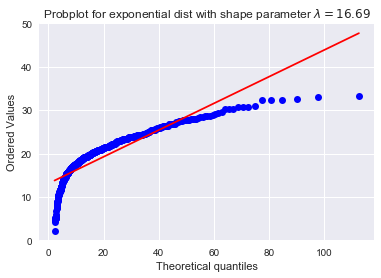

In [131]:
fig = plt.figure()
ax = fig.add_subplot(111)
#x = stats.loggamma.rvs(c=2.5, size=500)
res = stats.probplot(data, dist=stats.expon, sparams= pars_exp, plot=ax)
ax.set_title("Probplot for exponential dist with shape parameter $\lambda = %.2f$"%(pars_exp[1]))

Text(0.5,1,'Probplot for gamma dist with \n Shape: $k = 8.09$ \n Location: $\\mu = 0.00$ \n Scale: $\\lambda = 2.33$')

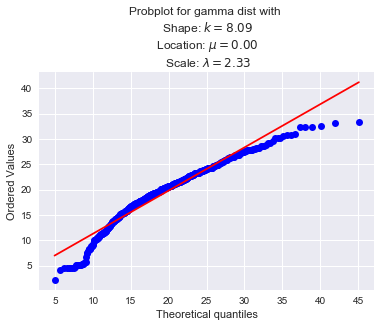

In [132]:
fig = plt.figure()
ax = fig.add_subplot(111)
res = stats.probplot(data, dist=stats.gamma, sparams= pars_gamma, plot=ax)
ax.set_title("Probplot for gamma dist with \n Shape: $k = %.2f$ \n Location: $\mu = %.2f$ \n Scale: $\lambda = %.2f$"%(pars_gamma[0],pars_gamma[1],pars_gamma[2]))

Text(0.5,1,'Probplot for weibull dist with \n Shape: $k = 4.41$ \n Location: $\\mu = 2.13$ \n Scale: $\\lambda = 18.36$')

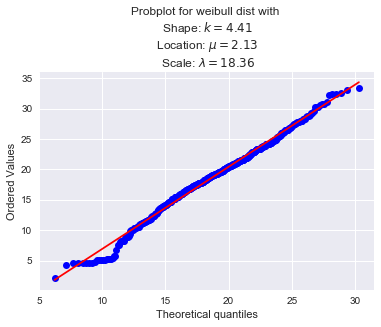

In [133]:
fig = plt.figure()
ax = fig.add_subplot(111)
res = stats.probplot(data, dist=stats.weibull_min, sparams= pars_weib, plot=ax)
ax.set_title("Probplot for weibull dist with \n Shape: $k = %.2f$ \n Location: $\mu = %.2f$ \n Scale: $\lambda = %.2f$"%(pars_weib[0],pars_weib[1],pars_weib[2]))

Text(0.5,1,'Probplot for lognormal dist with \n Shape: $k = 0.01$ \n Location: $\\mu = -1059.67$ \n Scale: $\\lambda = 1078.54$')

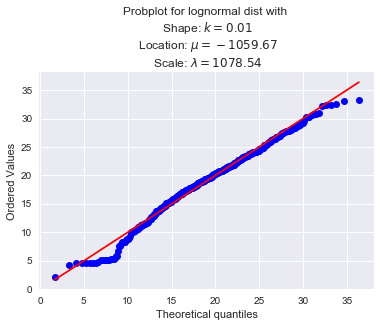

In [134]:
fig = plt.figure()
ax = fig.add_subplot(111)
res = stats.probplot(data, dist=stats.lognorm, sparams= pars_lognorm, plot=ax)
ax.set_title("Probplot for lognormal dist with \n Shape: $k = %.2f$ \n Location: $\mu = %.2f$ \n Scale: $\lambda = %.2f$"%(pars_lognorm[0],pars_lognorm[1],pars_lognorm[2]))

Text(0.5,1,'Probplot for genlogistic dist with \n Shape: 0.66 \n Location: 21.02 \n Scale: 2.73')

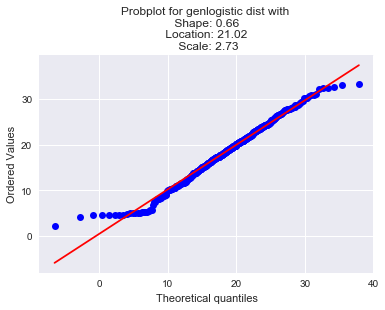

In [135]:
fig = plt.figure()
ax = fig.add_subplot(111)
res = stats.probplot(data, dist=stats.genlogistic, sparams= pars_genlogistic, plot=ax)
ax.set_title("Probplot for genlogistic dist with \n Shape: %.2f \n Location: %.2f \n Scale: %.2f"%(pars_genlogistic[0],pars_genlogistic[1],pars_genlogistic[2]))

Text(0.5,1,'Probplot for gumbells dist with \n Location: $\\mu = 21.71$ \n Scale: $\\lambda = 5.39$')

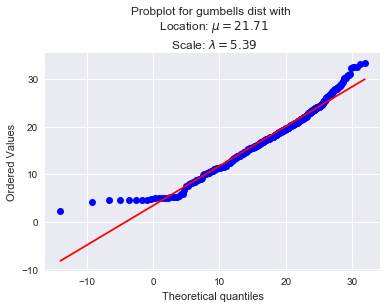

In [136]:
fig = plt.figure()
ax = fig.add_subplot(111)
res = stats.probplot(data, dist=stats.gumbel_l, sparams= pars_gumbells, plot=ax)
ax.set_title("Probplot for gumbells dist with \n Location: $\mu = %.2f$ \n Scale: $\lambda = %.2f$"%(pars_gumbells[0],pars_gumbells[1]))

Text(0.5,1,'Probplot for normal dist with \n $\\mu = 18.89$ \n $\\sigma = 5.80$')

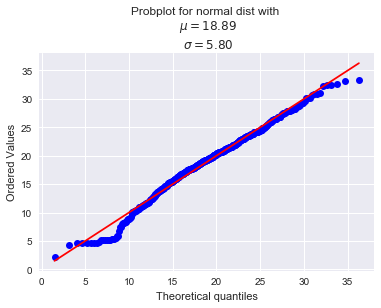

In [137]:
fig = plt.figure()
ax = fig.add_subplot(111)
res = stats.probplot(data, dist=stats.norm, sparams= pars_norm, plot=ax)
ax.set_title("Probplot for normal dist with \n $\mu = %.2f$ \n $\sigma = %.2f$"%(pars_norm[0],pars_norm[1]))

__Conclusión:__ Tomando-se los errores menores entre la reta y los puntos, llegamos a varias distribuiciones las cuales podrían se ajustadas. Notase que en un rango de 10 a 30 grados, Geologistic tiene un ajuste case perfecto.
- geologistic (en un rango definido)
- weibulls 
- lognorm    
- norm  
- gumbells
<br>

### 6. Automatizando la selección del modelo

In [138]:
def fit_models(data,model):
    fit = "stats."+ model +".fit(data)"
    pars = eval(fit)
    logpdf = "sum(stats."+model+".logpdf(data,*pars))"
    loglike = eval(logpdf)
    p = len([x for x in pars if x != 0])
    aic = AIC_compute(p,loglike)
    n  = data.count()
    bic = BIC_compute(n,p,loglike)
    return loglike, aic, bic

In [139]:
def test_models(data, models):
    ll = []; aic = []; bic = []; md = []

    for i in models:
        fm = fit_models(data, i)
        md.append(i)
        ll.append(fm[0])
        aic.append(fm[1])
        bic.append(fm[2])

    lst = [pd.Series(md), pd.Series(ll), pd.Series(aic), pd.Series(bic)]
    tb = pd.concat(lst, axis = 1)
    tb.columns = ['Model', 'LogLike','AIC', 'BIC']
    tb.set_index('Model', inplace=True)
    print ("Max LL  ==>", tb.LogLike.idxmax())
    print ("Min AIC ==>", tb.AIC.idxmin())
    print ("Min BIC ==>", tb.BIC.idxmin())
    return tb

In [140]:
models = ['expon','gamma','weibull_min', 'lognorm', 'genlogistic', 'gumbel_l', 'norm']

In [141]:
test_models(data, models)

Max LL  ==> genlogistic
Min AIC ==> genlogistic
Min BIC ==> genlogistic


,LogLike,AIC,BIC
Model,,,
expon,-1972.230870,3948.461740,3956.957825
gamma,-1646.470270,3298.940540,3311.684669
weibull_min,-1725.322987,3456.645974,3469.390103
lognorm,-1642.976271,3291.952543,3304.696671
genlogistic,-1639.226795,3284.453590,3297.197719
gumbel_l,-1657.924022,3319.848044,3328.344129
norm,-1642.493514,3288.987028,3297.483113


Aumentando el numero de modelos a testar y no considerando "genlogistic"

In [142]:
models = ['expon','gamma','weibull_min', 'lognorm', 'gumbel_l', 'norm','invgauss','alpha',
          'betaprime','burr','chi2','exponweib','fatiguelife','fisk','foldcauchy','genlogistic','genpareto',
          'genexpon','gengamma','gilbrat','norm','hypsecant','invgamma','invweibull','kappa3','levy',
          'loggamma','maxwell','mielke','ncx2','pearson3','powerlognorm','powernorm','rayleigh',
          'gumbel_r','exponpow','nakagami','gompertz','foldnorm','rice','recipinvgauss','skewnorm','wald']

In [143]:
tst = test_models(data, models)

Max LL  ==> burr
Min AIC ==> skewnorm
Min BIC ==> skewnorm


Mirando al detalle los mejores modelos

In [144]:
models = ['lognorm', 'genlogistic', 'norm', 'skewnorm', 'burr']
tst = test_models(data, models)
tst

Max LL  ==> burr
Min AIC ==> skewnorm
Min BIC ==> skewnorm


,LogLike,AIC,BIC
Model,,,
lognorm,-1642.976271,3291.952543,3304.696671
genlogistic,-1639.226795,3284.453590,3297.197719
norm,-1642.493514,3288.987028,3297.483113
skewnorm,-1637.218148,3280.436297,3293.180425
burr,-1636.307974,3280.615948,3297.608119


### 7. Selección del modelo para otros datos del dataset

In [145]:
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [146]:
models = ['expon','gamma','weibull_min', 'lognorm', 'gumbel_l', 'norm','invgauss','alpha',
          'betaprime','burr','chi2','exponweib','fatiguelife','fisk','foldcauchy','genlogistic','genpareto',
          'genexpon','gengamma','gilbrat','norm','hypsecant','invgamma','invweibull','kappa3','levy',
          'loggamma','maxwell','mielke','ncx2','pearson3','powerlognorm','powernorm','rayleigh',
          'gumbel_r','exponpow','nakagami','gompertz','foldnorm','rice','recipinvgauss','skewnorm','wald','genlogistic', 'recipinvgauss' ]

### Humidade


 * Sumário estatístico de los datos *

N         517
Mean      44.3
Std Dev   16.3
Median    42.0
Range     42.5
V.R.: 36.8 ==> Baja varianza


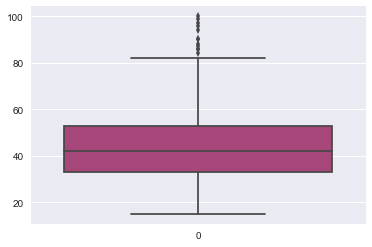

In [147]:
data = df.RH
sumario_estat(data)


 * Análisis de la distribución de los datos *

Skew: 0.9 ==> Distribución es sesgada a la derecha (RIGHT SKEW)
Kurtosis: 0.4 ==> Distribución es Mesocúrtica (-3 < kt > +3)


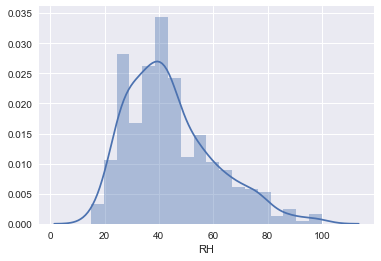

In [148]:
analise_distr(data)

In [149]:
tst = test_models(data, models)

Max LL  ==> skewnorm
Min AIC ==> skewnorm
Min BIC ==> skewnorm


Testeando con KSTEST

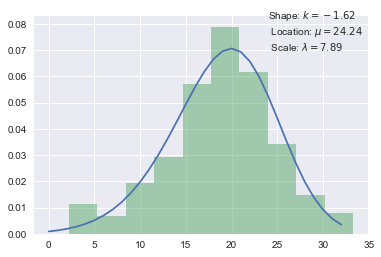

KstestResult(statistic=0.031001504104946398, pvalue=0.703061922129557)

In [169]:
pars_skewnorm = stats.skewnorm.fit(data)

fig = plt.figure() 
bins = range(int(np.max(data)))
ax = fig.add_subplot(1, 1, 1)
ax.plot(bins, stats.skewnorm.pdf(bins, pars_skewnorm[0],pars_skewnorm[1],pars_skewnorm[2]))
ax.hist(data, bins = 10 , normed=True, alpha=0.5)
ax.annotate("Shape: $k = %.2f$ \n Location: $\mu = %.2f$ \n Scale: $\lambda = %.2f$"%(pars_skewnorm[0],pars_skewnorm[1],pars_skewnorm[2]), xy=(0.7, 0.85), xycoords=ax.transAxes)
plt.show()

kstest(data, lambda x: stats.skewnorm.cdf(x, pars_skewnorm[0],pars_skewnorm[1],pars_skewnorm[2]))

El pvalue es mas grande que 0.05, lo que no se rechaza que para humidad se podria considerar la distribuición como Skewnormal

---

# Teste adicional de ajuste de modelo con "Sum of Square Error (SSE)"

Adaptado del original: https://stackoverflow.com/questions/6620471/fitting-empirical-distribution-to-theoretical-ones-with-scipy-python

In [151]:
import scipy.stats as st
import statsmodels as sm
import matplotlib

# Create models from data
def best_fit_distribution(data, bins=200, ax=None):
    """Model data by finding best fit distribution to data"""
    # Get histogram of original data
    y, x = np.histogram(data, bins=bins, density=True)
    x = (x + np.roll(x, -1))[:-1] / 2.0

    # Distributions to check
    DISTRIBUTIONS = [        
        st.alpha,st.anglit,st.arcsine,st.beta,st.betaprime,st.bradford,st.burr,st.cauchy,st.chi,st.chi2,st.cosine,
        st.dgamma,st.dweibull,st.erlang,st.expon,st.exponnorm,st.exponweib,st.exponpow,st.f,st.fatiguelife,st.fisk,
        st.foldcauchy,st.foldnorm,st.frechet_r,st.frechet_l,st.genlogistic,st.genpareto,st.gennorm,st.genexpon,
        st.genextreme,st.gausshyper,st.gamma,st.gengamma,st.genhalflogistic,st.gilbrat,st.gompertz,st.gumbel_r,
        st.gumbel_l,st.halfcauchy,st.halflogistic,st.halfnorm,st.halfgennorm,st.hypsecant,st.invgamma,st.invgauss,
        st.invweibull,st.johnsonsb,st.johnsonsu,st.ksone,st.kstwobign,st.laplace,st.levy,st.levy_l,st.levy_stable,
        st.logistic,st.loggamma,st.loglaplace,st.lognorm,st.lomax,st.maxwell,st.mielke,st.nakagami,st.ncx2,st.ncf,
        st.nct,st.norm,st.pareto,st.pearson3,st.powerlaw,st.powerlognorm,st.powernorm,st.rdist,st.reciprocal,
        st.rayleigh,st.rice,st.recipinvgauss,st.semicircular,st.t,st.triang,st.truncexpon,st.truncnorm,st.tukeylambda,
        st.uniform,st.vonmises,st.vonmises_line,st.wald,st.weibull_min,st.weibull_max,st.wrapcauchy
    ]

    # Best holders
    best_distribution = st.norm
    best_params = (0.0, 1.0)
    best_sse = np.inf

    # Estimate distribution parameters from data
    for distribution in DISTRIBUTIONS:

        # Try to fit the distribution
        try:
            # Ignore warnings from data that can't be fit
            with warnings.catch_warnings():
                warnings.filterwarnings('ignore')

                # fit dist to data
                params = distribution.fit(data)

                # Separate parts of parameters
                arg = params[:-2]
                loc = params[-2]
                scale = params[-1]

                # Calculate fitted PDF and error with fit in distribution
                pdf = distribution.pdf(x, loc=loc, scale=scale, *arg)
                sse = np.sum(np.power(y - pdf, 2.0))

                # if axis pass in add to plot
                try:
                    if ax:
                        pd.Series(pdf, x).plot(ax=ax)
                    end
                except Exception:
                    pass

                # identify if this distribution is better
                if best_sse > sse > 0:
                    best_distribution = distribution
                    best_params = params
                    best_sse = sse

        except Exception:
            pass

    return (best_distribution.name, best_params)

In [152]:
def make_pdf(dist, params, size=10000):
    """Generate distributions's Propbability Distribution Function """

    # Separate parts of parameters
    arg = params[:-2]
    loc = params[-2]
    scale = params[-1]

    # Get sane start and end points of distribution
    start = dist.ppf(0.01, *arg, loc=loc, scale=scale) if arg else dist.ppf(0.01, loc=loc, scale=scale)
    end = dist.ppf(0.99, *arg, loc=loc, scale=scale) if arg else dist.ppf(0.99, loc=loc, scale=scale)

    # Build PDF and turn into pandas Series
    x = np.linspace(start, end, size)
    y = dist.pdf(x, loc=loc, scale=scale, *arg)
    pdf = pd.Series(y, x)

    return pdf

In [153]:
def plot_best(data):

    # Plot for comparison
    plt.figure(figsize=(12,8))
    ax = data.plot(kind='hist', bins=50, normed=True, alpha=0.5, color=plt.rcParams['axes.color_cycle'][1])

    # Save plot limits
    dataYLim = ax.get_ylim()

    # Find best fit distribution
    best_fit_name, best_fir_paramms = best_fit_distribution(data, 200, ax)
    best_dist = getattr(st, best_fit_name)

    # Update plots
    ax.set_ylim(dataYLim)
    ax.set_title(u'Dataset Model Fit\n All Fitted Distributions')
    ax.set_xlabel(u'Data')
    ax.set_ylabel('Frequency')

    # Make PDF
    pdf = make_pdf(best_dist, best_fir_paramms)

    # Display
    plt.figure(figsize=(12,8))
    ax = pdf.plot(lw=2, label='PDF', legend=True)
    data.plot(kind='hist', bins=50, normed=True, alpha=0.5, label='Data', legend=True, ax=ax)

    param_names = (best_dist.shapes + ', loc, scale').split(', ') if best_dist.shapes else ['loc', 'scale']
    param_str = ', '.join(['{}={:0.2f}'.format(k,v) for k,v in zip(param_names, best_fir_paramms)])
    dist_str = '{}({})'.format(best_fit_name, param_str)

    ax.set_title(u'Best fit distribution \n' + dist_str)
    ax.set_xlabel(u'Data')
    ax.set_ylabel('Frequency')

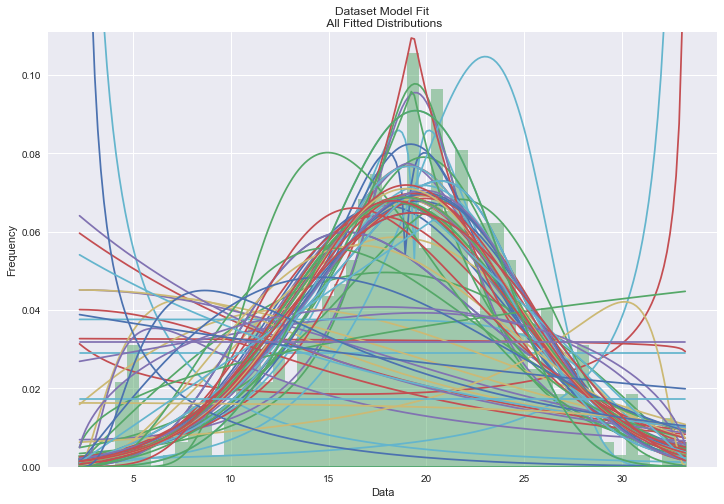

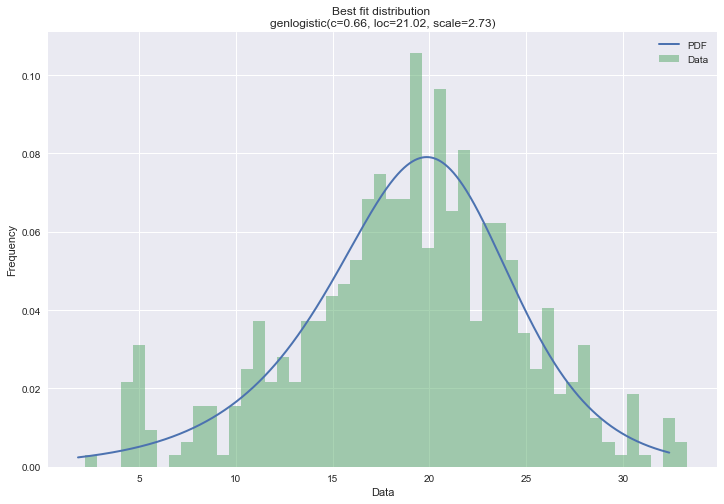

In [154]:
# Load data
data = df.temp

plot_best(data)

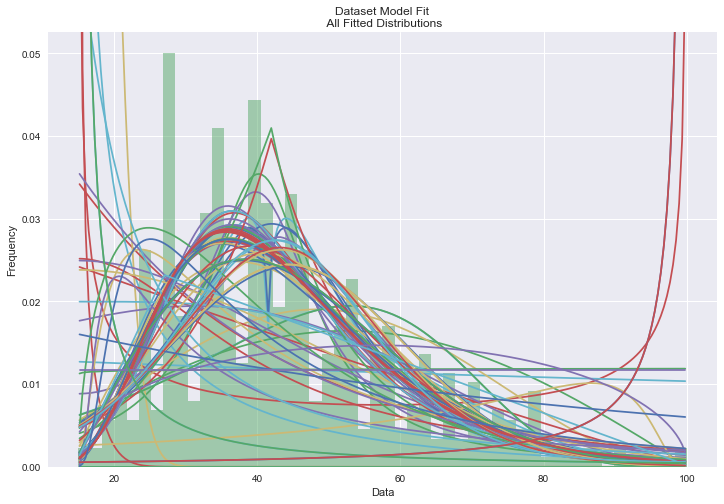

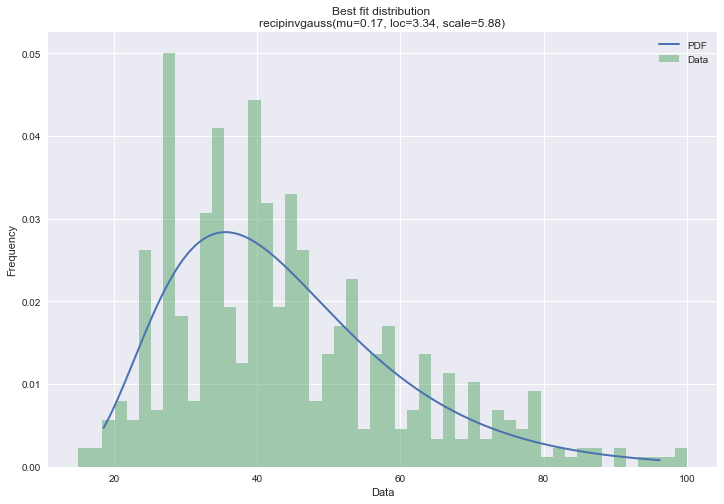

In [155]:
plot_best(df.RH)

___